## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [62]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)
    # rows, cols = image.shape

    # for i in range(rows):
    #     for j in range(cols):
    #         intensity = image[i,j]
    #         hist[intensity] += 1
    intensity, cnt = np.unique(image, return_counts=True)
    hist[intensity]=cnt
    return hist

In [63]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  
  cdf = np.zeros(256, dtype=float)
  rows, cols = channel.shape
  hist = calc_hist(channel)

  # calculate PDF and CDF
  pdf = hist / (rows * cols)
  cdf=np.cumsum(pdf)

  return cdf


In [83]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  
  
  

  for channel, title in channels:
      # Compute cdf for the source image channel
      src_cdf = calc_cdf(src_image[:, :, channel])
      ref_cdf = calc_cdf(ref_image[:, :, channel])
      # x->y  va newx => interp(x,y,newx) madel y ro mide
      inv_cdf = np.interp(src_cdf, ref_cdf, np.arange(256))
      
      
      output_image[:, :, channel] = inv_cdf[output_image[:, :, channel]]
      

  return output_image

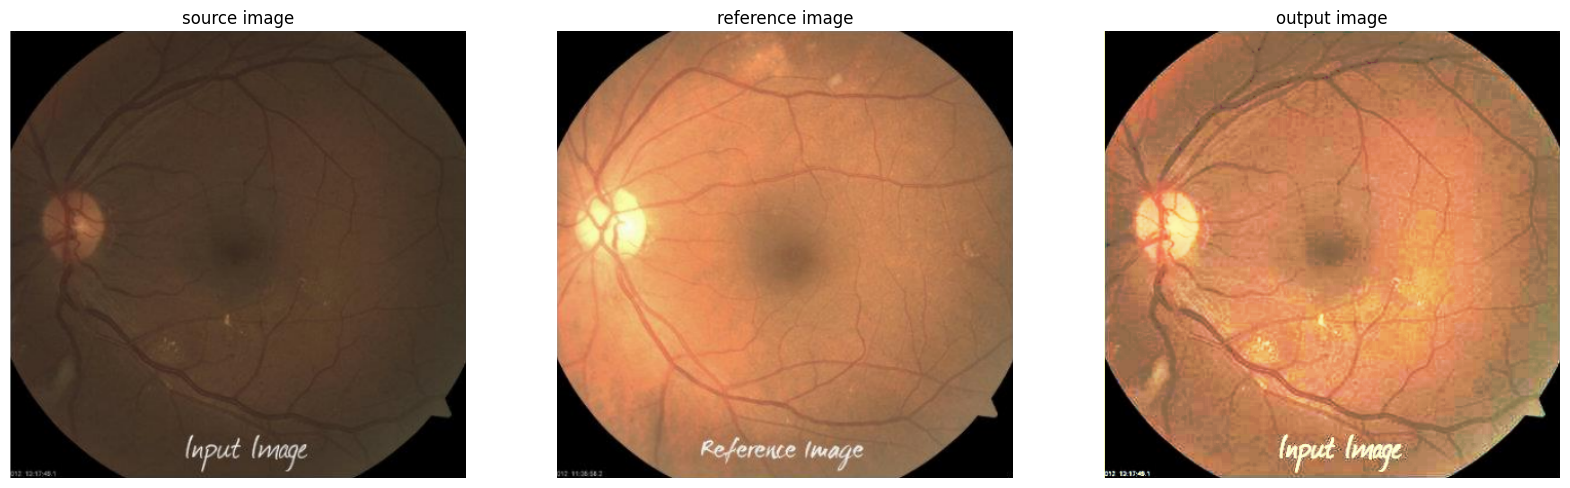

In [84]:
# Do not change this cell
src = cv2.imread('Q4_images/input.png').astype(np.uint8)
ref = cv2.imread('Q4_images/ref.png').astype(np.uint8)
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

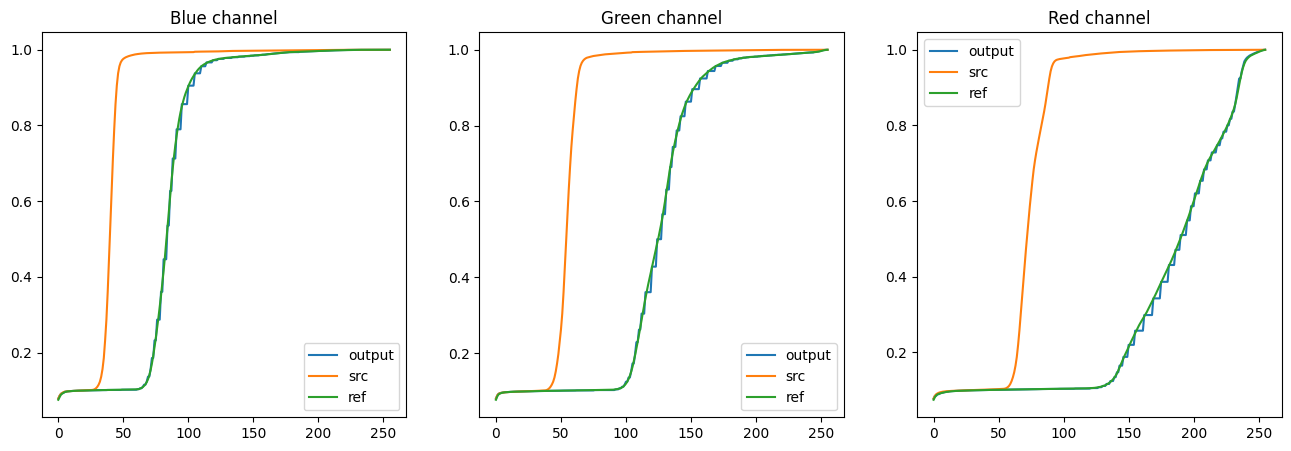

In [73]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)